In [1]:
import sys
import os

import pandas as pd

In [2]:
df = pd.read_csv("./data_mt5_ticks/usdjpy_2024_ticks.csv", index_col='datetime', parse_dates=True)
df = df.dropna()

df

,bid,ask
datetime,,
2024-01-01 22:05:00.231000+00:00,140.836,140.885
2024-01-01 22:06:08.514000+00:00,140.839,140.886
2024-01-01 22:06:11.437000+00:00,140.842,140.888
2024-01-01 22:07:20.173000+00:00,140.842,140.888
2024-01-01 22:08:02.036000+00:00,140.842,140.888
...,...,...
2024-03-31 23:59:58.110000+00:00,151.405,151.418
2024-03-31 23:59:58.212000+00:00,151.406,151.419
2024-03-31 23:59:58.314000+00:00,151.405,151.418


In [3]:
df['spread'] = df['ask'] - df['bid']
df

,bid,ask,spread
datetime,,,
2024-01-01 22:05:00.231000+00:00,140.836,140.885,0.049
2024-01-01 22:06:08.514000+00:00,140.839,140.886,0.047
2024-01-01 22:06:11.437000+00:00,140.842,140.888,0.046
2024-01-01 22:07:20.173000+00:00,140.842,140.888,0.046
2024-01-01 22:08:02.036000+00:00,140.842,140.888,0.046
...,...,...,...
2024-03-31 23:59:58.110000+00:00,151.405,151.418,0.013
2024-03-31 23:59:58.212000+00:00,151.406,151.419,0.013
2024-03-31 23:59:58.314000+00:00,151.405,151.418,0.013


<Axes: >

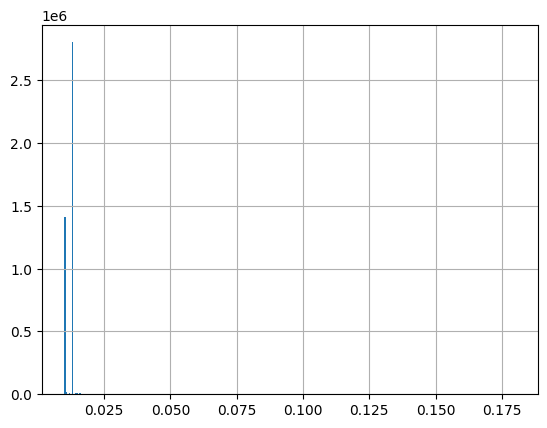

In [4]:
df['spread'].hist(bins=300)

In [5]:
df[df['spread']>0.1]

,bid,ask,spread
datetime,,,
2024-01-01 22:28:08.957000+00:00,140.854,140.957,0.103
2024-01-01 22:28:09.122000+00:00,140.852,140.957,0.105
2024-01-01 22:28:31.065000+00:00,140.870,140.998,0.128
2024-01-01 22:28:31.218000+00:00,140.852,140.998,0.146
2024-01-01 22:28:35.206000+00:00,140.867,140.998,0.131
...,...,...,...
2024-03-31 21:57:13.776000+00:00,151.229,151.342,0.113
2024-03-31 21:57:14.480000+00:00,151.233,151.342,0.109
2024-03-31 21:57:15.085000+00:00,151.233,151.339,0.106


In [6]:
df[df['spread']>0.15]

,bid,ask,spread
datetime,,,
2024-01-02 22:05:12.117000+00:00,141.880,142.060,0.180
2024-01-02 22:58:16.752000+00:00,141.985,142.141,0.156
2024-01-02 22:58:16.954000+00:00,141.982,142.142,0.160
2024-01-02 22:58:17.157000+00:00,141.982,142.147,0.165
2024-01-02 22:58:17.258000+00:00,141.982,142.148,0.166
...,...,...,...
2024-03-29 20:53:47.717000+00:00,151.262,151.413,0.151
2024-03-29 20:53:47.913000+00:00,151.262,151.412,0.150
2024-03-29 20:53:48.014000+00:00,151.260,151.412,0.152


In [7]:
df['half_spread'     ] = df['spread'] / 2.0
df['mid_price'       ] = (df['ask'] + df['bid']) / 2.0
df['half_spread_rate'] = df['half_spread'] / df['mid_price']*100.0

<Axes: >

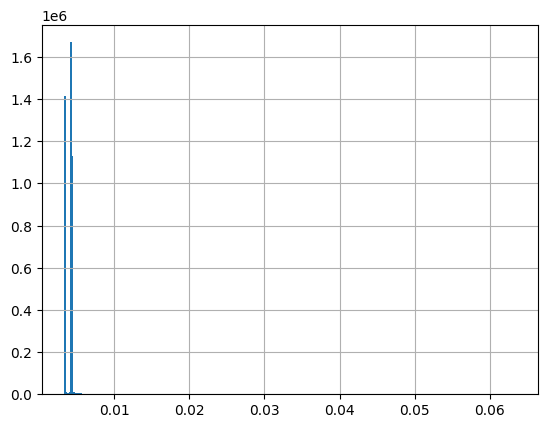

In [8]:
df['half_spread_rate'].hist(bins=300)

In [9]:
df

,bid,ask,spread,half_spread,mid_price,half_spread_rate
datetime,,,,,,
2024-01-01 22:05:00.231000+00:00,140.836,140.885,0.049,0.0245,140.8605,0.017393
2024-01-01 22:06:08.514000+00:00,140.839,140.886,0.047,0.0235,140.8625,0.016683
2024-01-01 22:06:11.437000+00:00,140.842,140.888,0.046,0.0230,140.8650,0.016328
2024-01-01 22:07:20.173000+00:00,140.842,140.888,0.046,0.0230,140.8650,0.016328
2024-01-01 22:08:02.036000+00:00,140.842,140.888,0.046,0.0230,140.8650,0.016328
...,...,...,...,...,...,...
2024-03-31 23:59:58.110000+00:00,151.405,151.418,0.013,0.0065,151.4115,0.004293
2024-03-31 23:59:58.212000+00:00,151.406,151.419,0.013,0.0065,151.4125,0.004293
2024-03-31 23:59:58.314000+00:00,151.405,151.418,0.013,0.0065,151.4115,0.004293


In [10]:
df[df['spread']>0.15]

,bid,ask,spread,half_spread,mid_price,half_spread_rate
datetime,,,,,,
2024-01-02 22:05:12.117000+00:00,141.880,142.060,0.180,0.0900,141.9700,0.063394
2024-01-02 22:58:16.752000+00:00,141.985,142.141,0.156,0.0780,142.0630,0.054905
2024-01-02 22:58:16.954000+00:00,141.982,142.142,0.160,0.0800,142.0620,0.056313
2024-01-02 22:58:17.157000+00:00,141.982,142.147,0.165,0.0825,142.0645,0.058072
2024-01-02 22:58:17.258000+00:00,141.982,142.148,0.166,0.0830,142.0650,0.058424
...,...,...,...,...,...,...
2024-03-29 20:53:47.717000+00:00,151.262,151.413,0.151,0.0755,151.3375,0.049888
2024-03-29 20:53:47.913000+00:00,151.262,151.412,0.150,0.0750,151.3370,0.049558
2024-03-29 20:53:48.014000+00:00,151.260,151.412,0.152,0.0760,151.3360,0.050219


In [13]:
df['spread'].mean(), df['spread'].median(), df['spread'].min(), df['spread'].max()

(0.01258105566702969,
 0.01300000000000523,
 0.009999999999990905,
 0.18000000000000682)

In [14]:
df['half_spread_rate'].mean(), df['half_spread_rate'].median(), df['half_spread_rate'].min(), df['half_spread_rate'].max()

(0.00424073739688694,
 0.0043204727261867935,
 0.0033600795666906334,
 0.06339367472001367)